In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 기본 폰트 설정
plt.rc("font", family="Malgun Gothic")
# '-' 기호 표시 설정
plt.rc("axes", unicode_minus=False)
# 선명도
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
# 스타일 변경
plt.style.use("fivethirtyeight")

In [2]:
data = "data/seoul-covid19_6_30_.csv"
data

'data/seoul-covid19_6_30_.csv'

In [3]:
df = pd.read_csv(data)
df.shape

(1321, 7)

In [4]:
# 데이터타입 날짜형태로 변환

df["확진일자"] = pd.to_datetime("2020-" + df["확진일"].str.replace(".", "-"))
df[["확진일", "확진일자"]]

,확진일,확진일자
0,6.30.,2020-06-30
1,6.30.,2020-06-30
2,6.30.,2020-06-30
3,6.30.,2020-06-30
4,6.30.,2020-06-30
...,...,...
1316,1.31.,2020-01-31
1317,1.30.,2020-01-30
1318,1.30.,2020-01-30
1319,1.30.,2020-01-30


In [5]:
# 월만 추출

df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자", "월"]].head()

,확진일,확진일자,월
0,6.30.,2020-06-30,6
1,6.30.,2020-06-30,6
2,6.30.,2020-06-30,6
3,6.30.,2020-06-30,6
4,6.30.,2020-06-30,6


In [6]:
# 해당 연도의 몇 번째 주인가?

df["주"] = df["확진일자"].dt.week
df[["확진일", "확진일자", "월", "주"]].head()

<ipython-input-6-898aa8597102>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["주"] = df["확진일자"].dt.week


,확진일,확진일자,월,주
0,6.30.,2020-06-30,6,27
1,6.30.,2020-06-30,6,27
2,6.30.,2020-06-30,6,27
3,6.30.,2020-06-30,6,27
4,6.30.,2020-06-30,6,27


In [7]:
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])

In [8]:
day_counts = df["월일"].value_counts().sort_index()

## 모든 날짜를 행에 만들어 주기

In [9]:
# 첫번째 방식이 더 빠르다

first_day = df.iloc[-1,7]
last_day = df.iloc[0]["확진일자"]

In [10]:
%timeit first_day = df.iloc[-1,7]

48.9 µs ± 1.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%timeit last_day = df.iloc[0]["확진일자"]

152 µs ± 4.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%timeit last_day = df.iloc[0,7]

47.1 µs ± 692 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
days = pd.date_range(first_day,last_day)
days[:5]

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [14]:
# dataframe 으로 바꾸기

# 1. days.to_frame()
df_days = pd.DataFrame({'확진일자' : days})
df_days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [15]:
daily_case = df['확진일자'].value_counts()
df_daily_case = daily_case.to_frame()
df_daily_case.head()

,확진일자
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


In [16]:
df_daily_case.columns = ['확진수']
df_daily_case.head()

,확진수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


In [17]:
all_day = df_days.merge(df_daily_case, left_on='확진일자', right_on=df_daily_case.index, how='left')
all_day.head()

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


## 누적 확진자 수

In [18]:
all_day['확진수'].sum()

1321.0

In [19]:
# 결측치 0으로 변환 후 누적합

all_day['누적확진'] = all_day['확진수'].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
154,2020-06-26,17.0,1284.0
155,2020-06-27,14.0,1298.0
156,2020-06-28,7.0,1305.0
157,2020-06-29,8.0,1313.0


In [20]:
all_day['일자'] = all_day['확진일자'].astype(str).map(lambda x : x[-5:])
all_day

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28
...,...,...,...,...
154,2020-06-26,17.0,1284.0,06-26
155,2020-06-27,14.0,1298.0,06-27
156,2020-06-28,7.0,1305.0,06-28
157,2020-06-29,8.0,1313.0,06-29


In [21]:
cum_day = all_day[["일자", '확진수', '누적확진']]
cum_day = cum_day.set_index('일자')
cum_day.head()

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0


<AxesSubplot:xlabel='일자'>

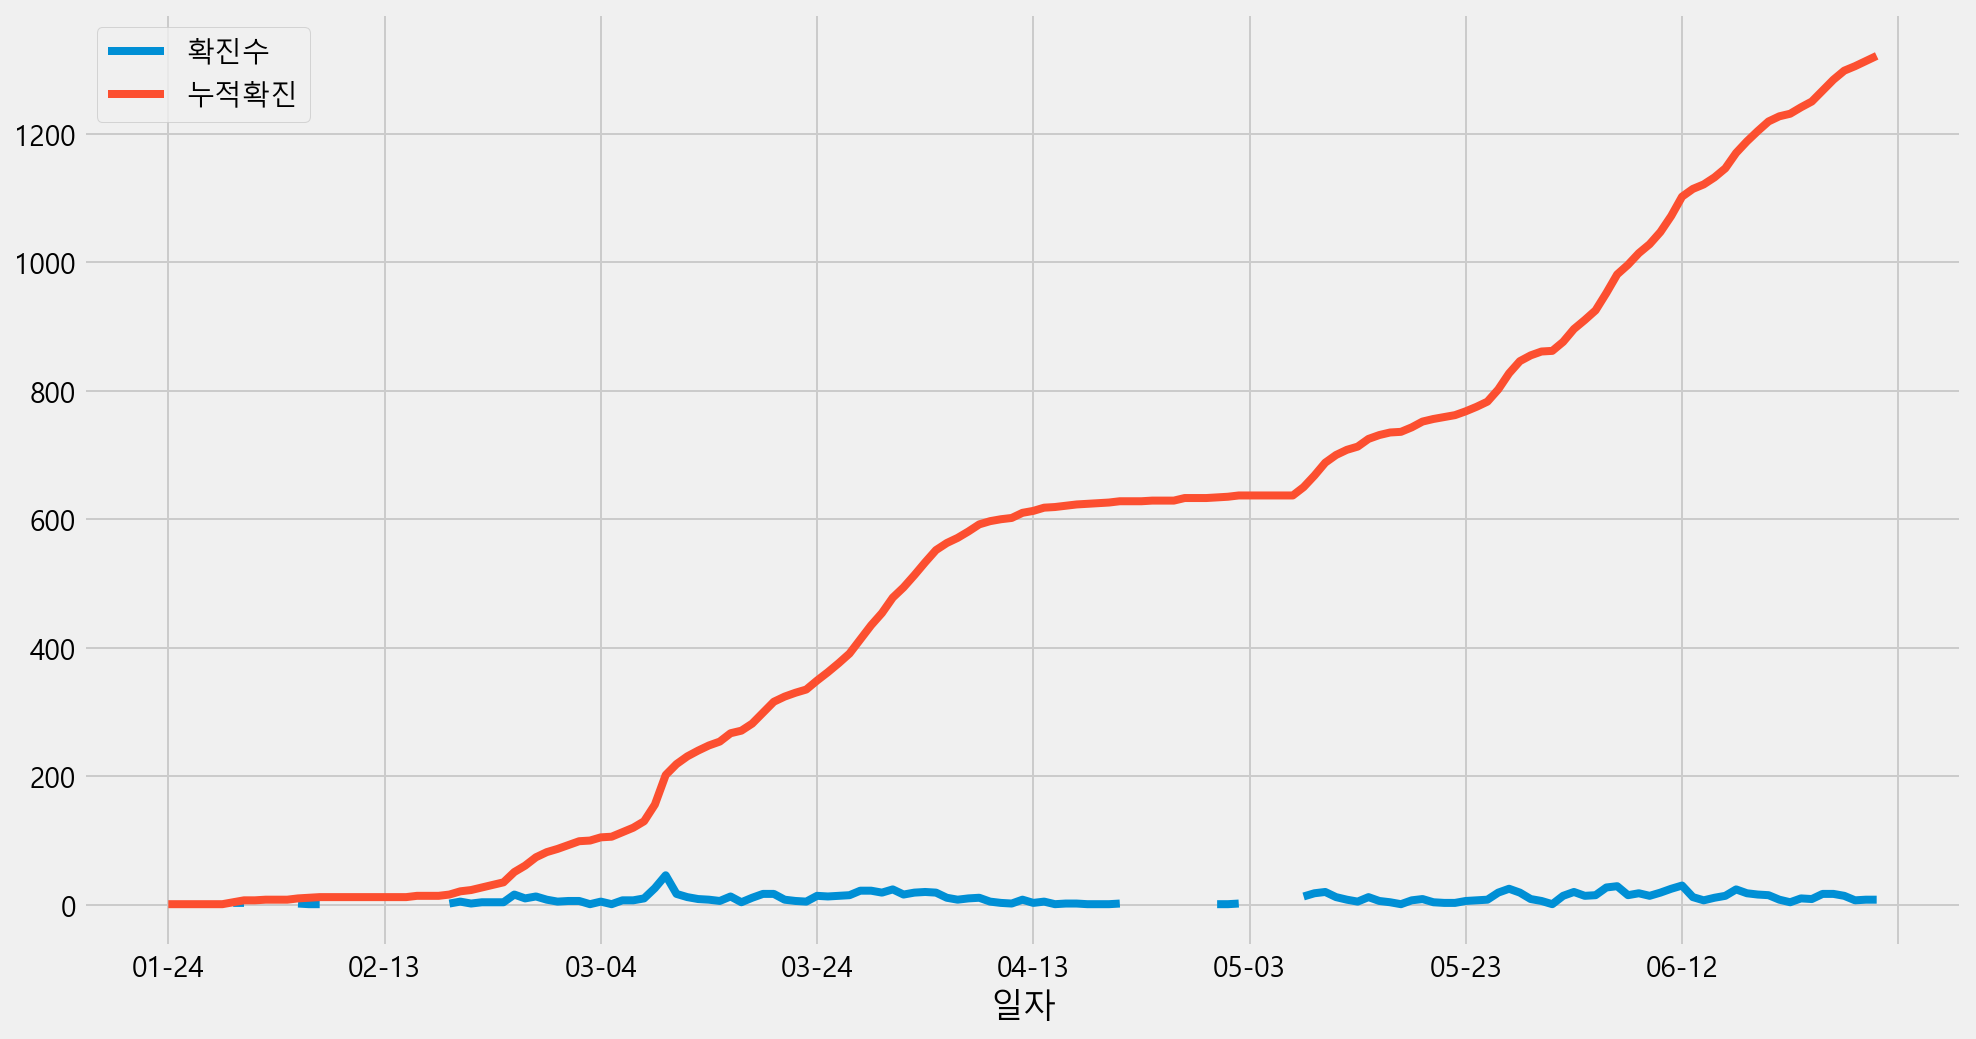

In [22]:
# dataframe으로 그리기

cum_day.plot(figsize=(15,8))

<AxesSubplot:xlabel='일자'>

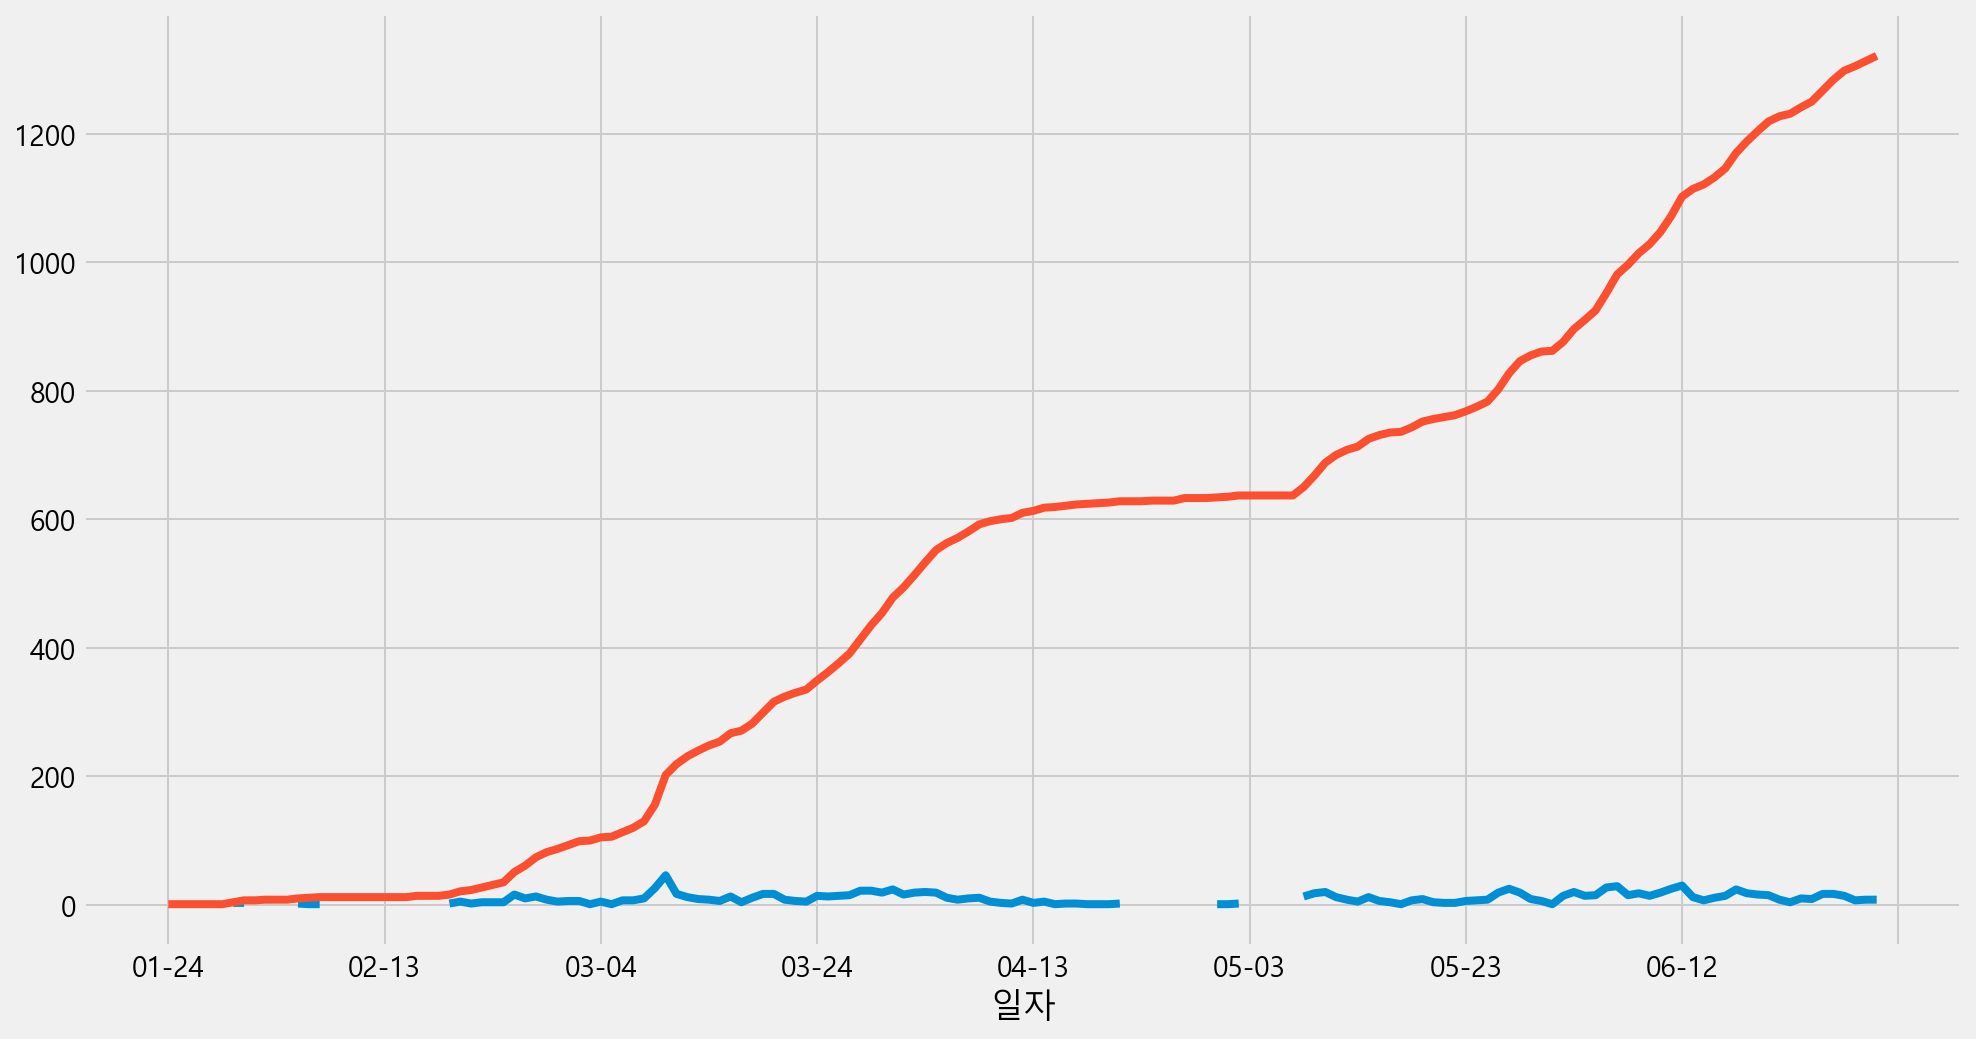

In [23]:
# 시리즈로 그리기

cum_day['확진수'].plot(figsize = (15,8))
cum_day['누적확진'].plot()

<AxesSubplot:xlabel='일자'>

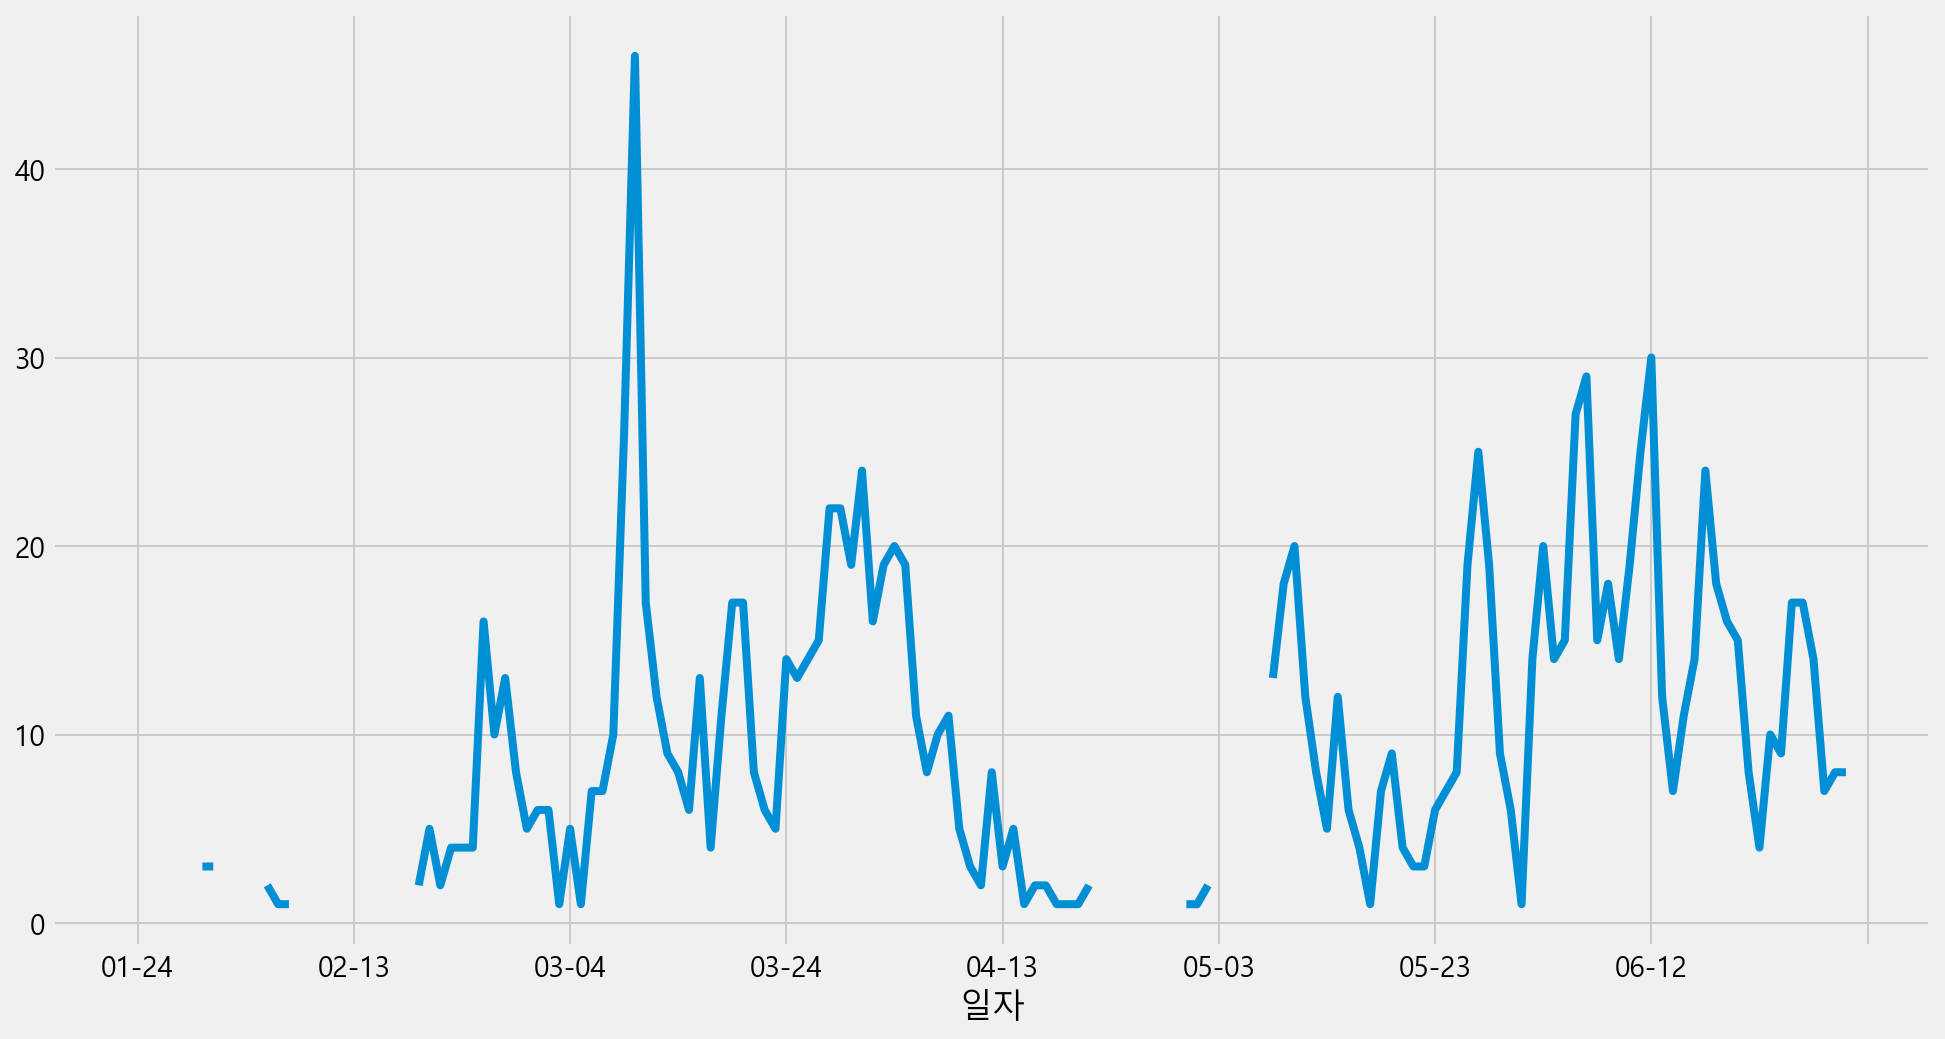

In [24]:
cum_day['확진수'].plot(figsize = (15,8))

<AxesSubplot:xlabel='일자'>

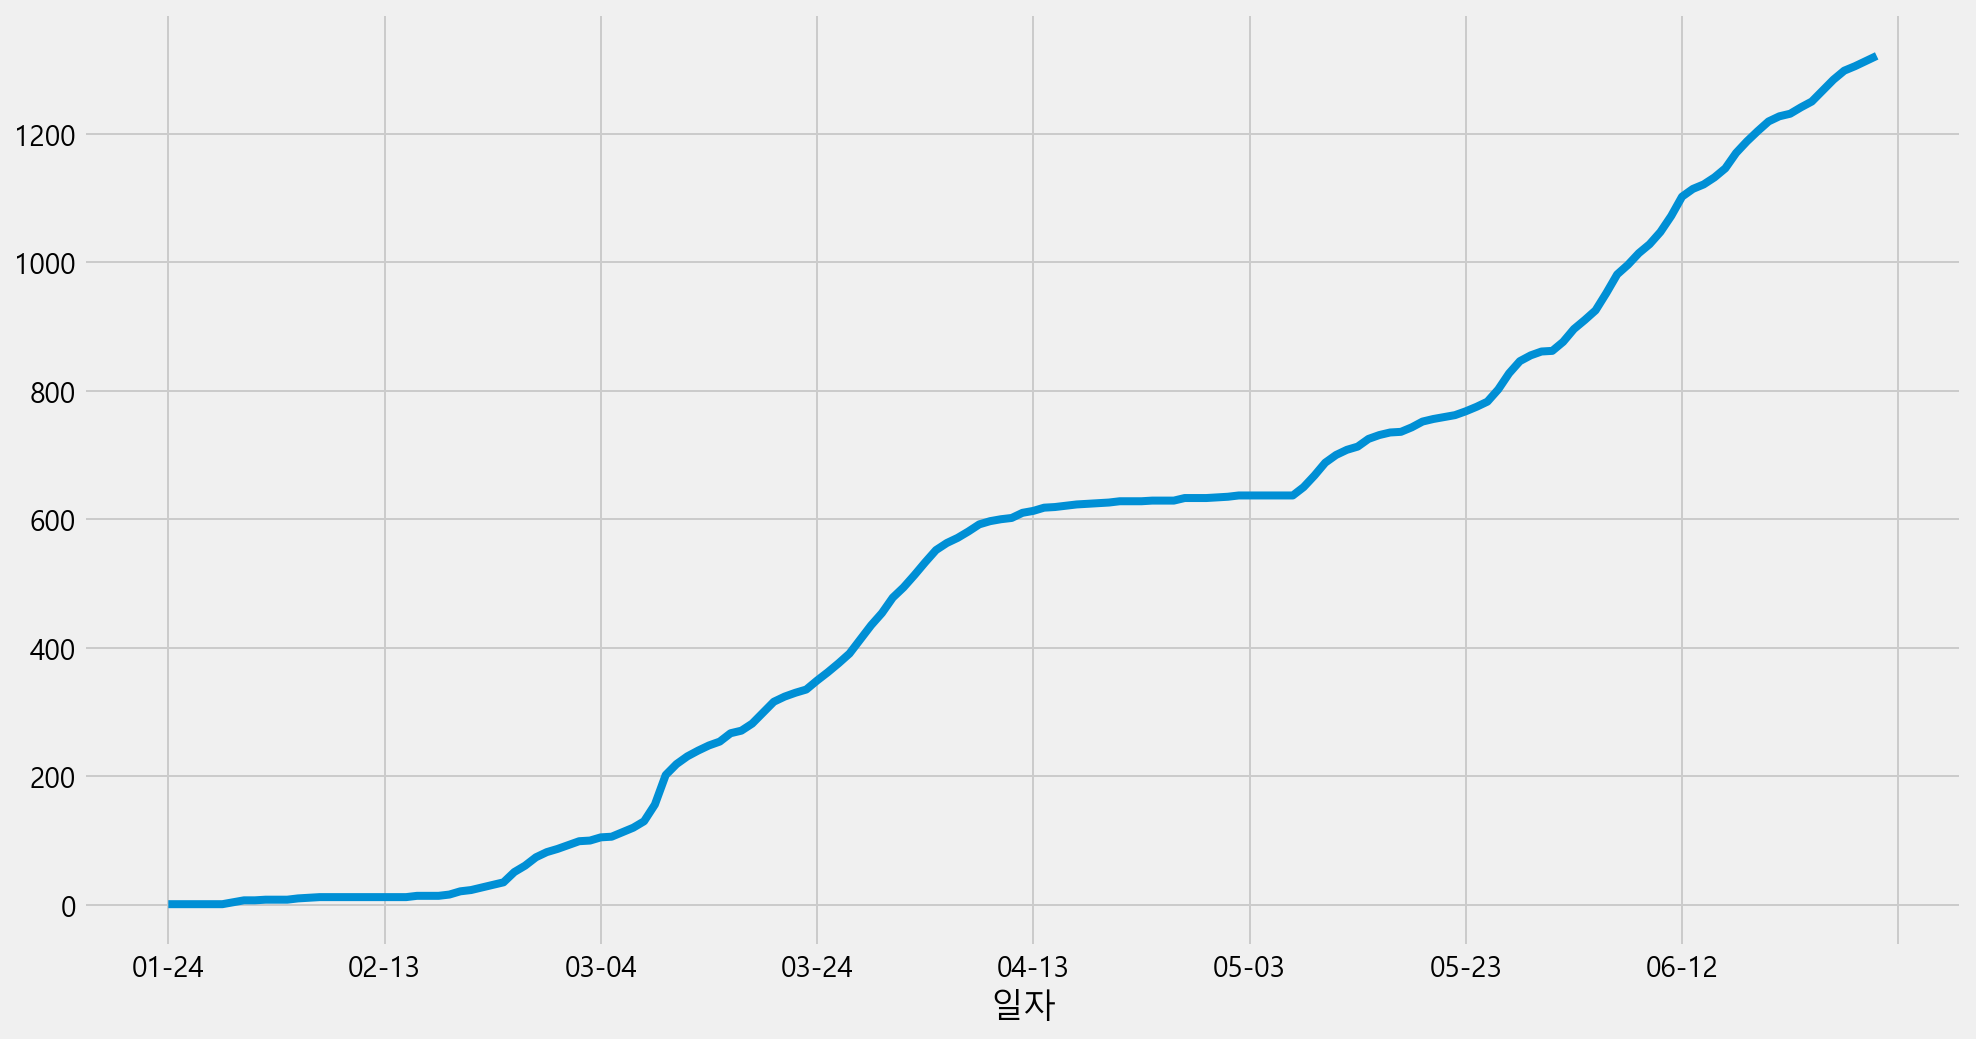

In [25]:
cum_day['누적확진'].plot(figsize = (15,8))

<AxesSubplot:xlabel='일자'>

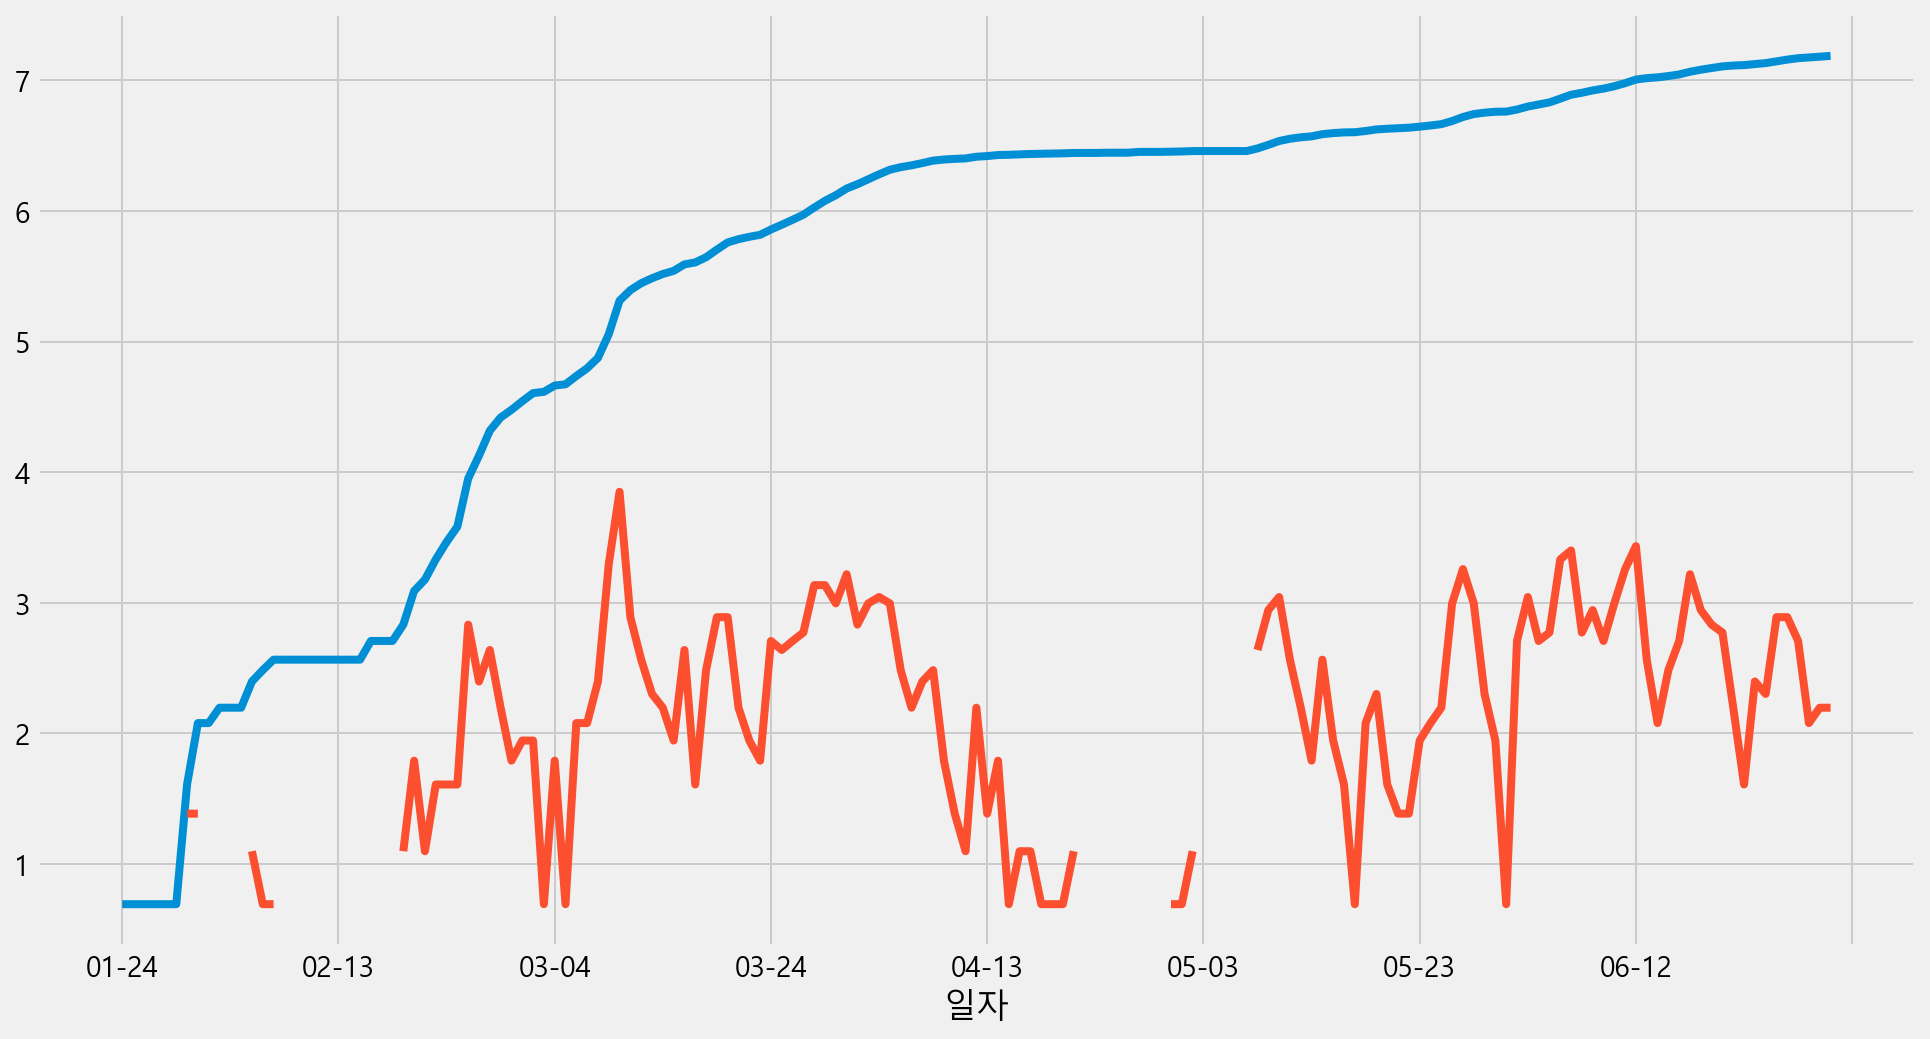

In [26]:
# 스케일 조정 후 그래프 그리기(로그스케일)
# 1보다 작으면 음수나올 수도 있기 때문에 +1을 해주는 경우도 있다.

np.log(cum_day['누적확진'] + 1).plot(figsize = (15,8))
np.log(cum_day['확진수'] + 1).plot(figsize = (15,8))

In [27]:
all_day['확진월'] = all_day['확진일자'].dt.month
all_day['확진요일'] = all_day['확진일자'].dt.dayofweek
all_day

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1
...,...,...,...,...,...,...
154,2020-06-26,17.0,1284.0,06-26,6,4
155,2020-06-27,14.0,1298.0,06-27,6,5
156,2020-06-28,7.0,1305.0,06-28,6,6
157,2020-06-29,8.0,1313.0,06-29,6,0


## 요일별 확진수

In [41]:
all_day_week = all_day.groupby(['확진월', '확진요일'])['확진수'].sum()
all_day_week = all_day_week.unstack().astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [43]:
dayofweek = '월 화 수 목 금 토 일'
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [45]:
all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [49]:
all_day_week.style.background_gradient(cmap='Greens')

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


## 거주지별 확진자

In [52]:
gu_count = df['거주지'].value_counts()
gu_count.head()

관악구    117
구로구     86
강남구     83
강서구     78
양천구     70
Name: 거주지, dtype: int64

<AxesSubplot:>

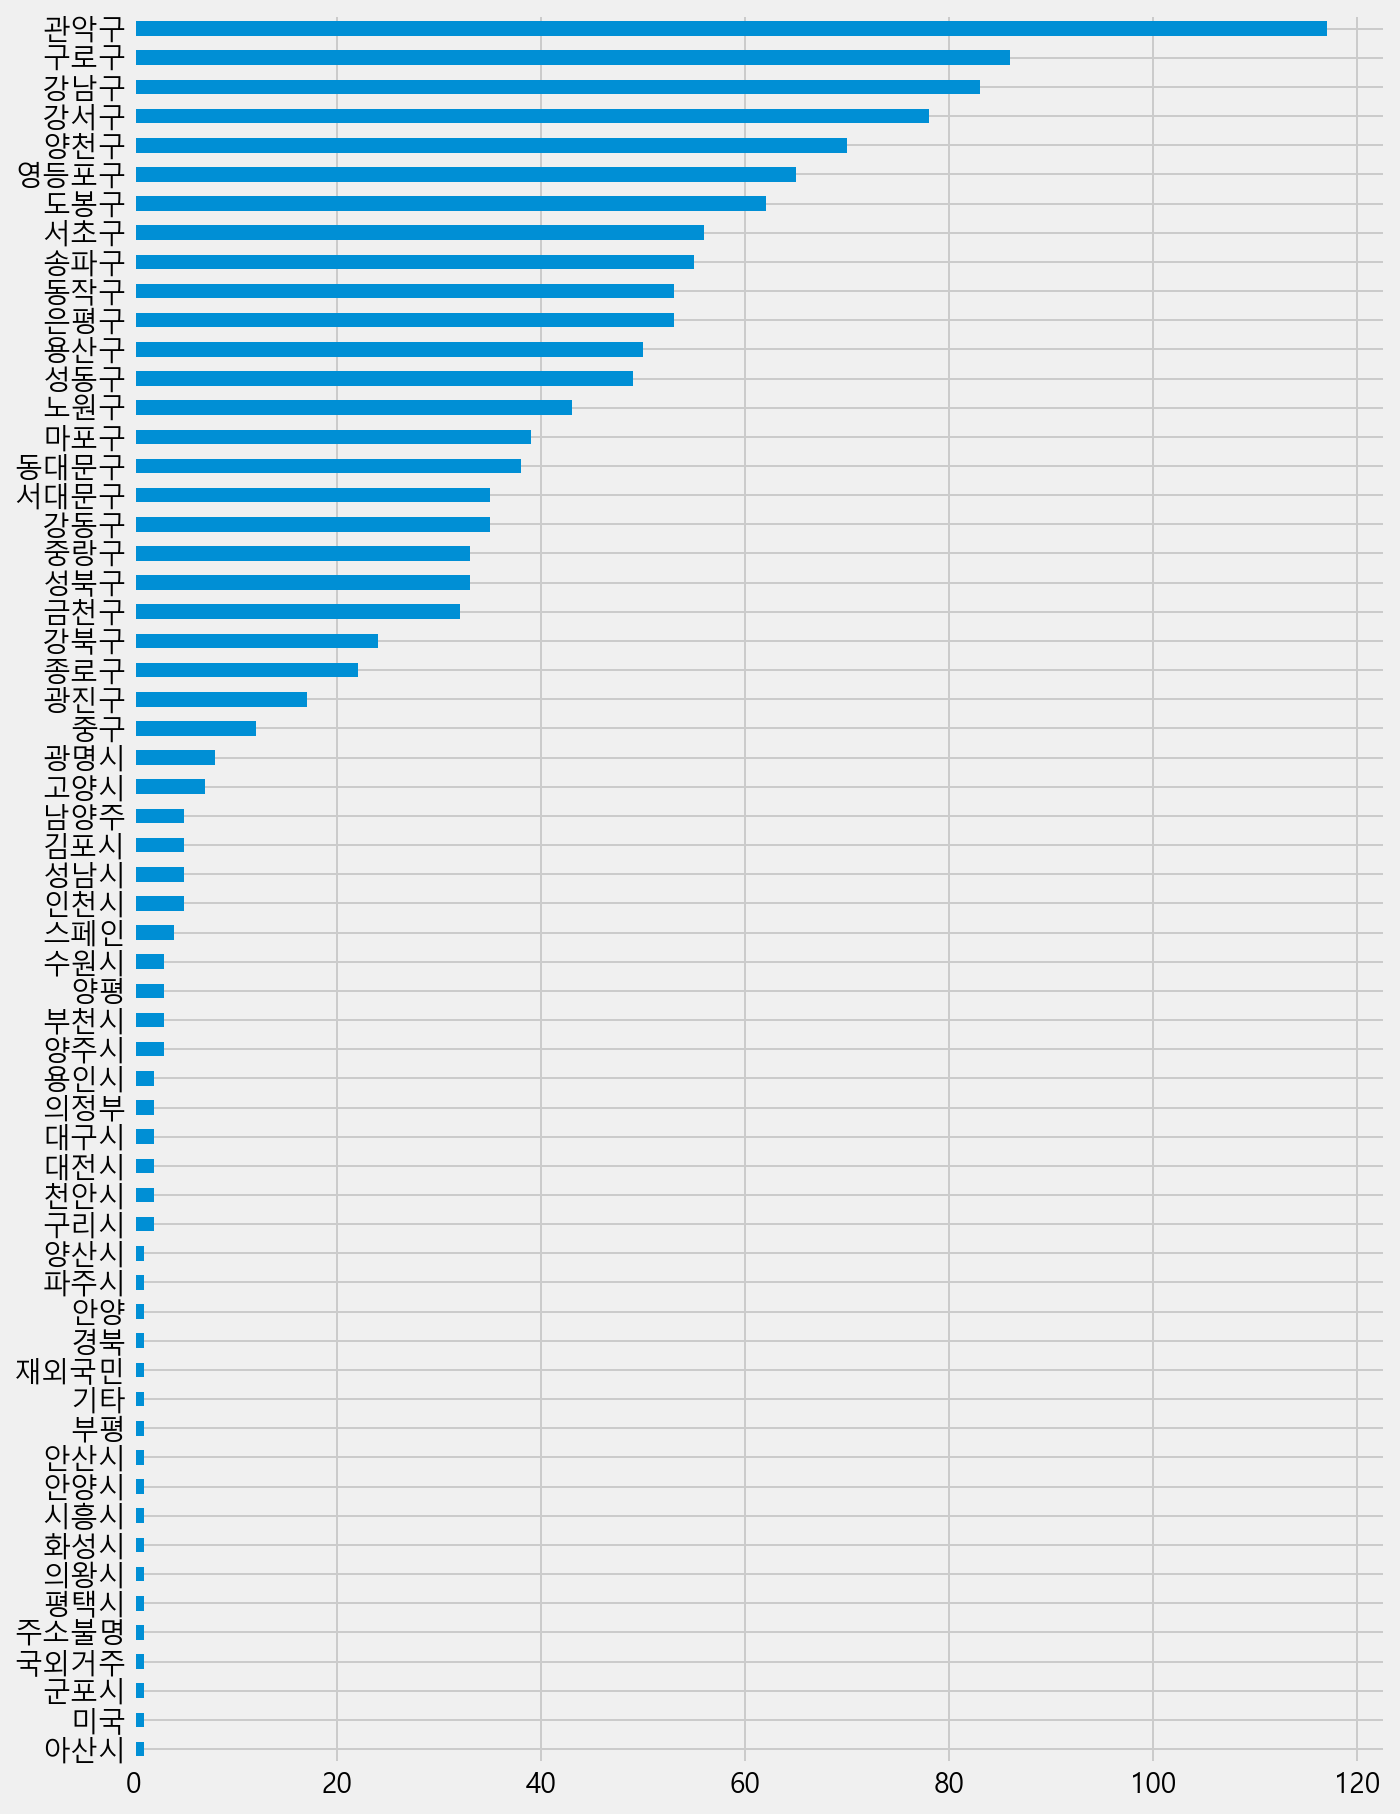

In [61]:
gu_count.sort_values().plot.barh(figsize = (10,15))

In [67]:
# 거주지가 서울시인 사람들만 가져오기

gu = gu_count[:25].index
gu

Index(['관악구', '구로구', '강남구', '강서구', '양천구', '영등포구', '도봉구', '서초구', '송파구', '동작구',
       '은평구', '용산구', '성동구', '노원구', '마포구', '동대문구', '서대문구', '강동구', '중랑구', '성북구',
       '금천구', '강북구', '종로구', '광진구', '중구'],
      dtype='object')

In [68]:
# 거주지가 서울이 아닌 사람들 가져오기

set(gu_count.index) - set(gu)

{'경북',
 '고양시',
 '광명시',
 '구리시',
 '국외거주',
 '군포시',
 '기타',
 '김포시',
 '남양주',
 '대구시',
 '대전시',
 '미국',
 '부천시',
 '부평',
 '성남시',
 '수원시',
 '스페인',
 '시흥시',
 '아산시',
 '안산시',
 '안양',
 '안양시',
 '양산시',
 '양주시',
 '양평',
 '용인시',
 '의왕시',
 '의정부',
 '인천시',
 '재외국민',
 '주소불명',
 '천안시',
 '파주시',
 '평택시',
 '화성시'}

In [74]:
# reset_index() 이용해 dataframe으로 변환

df_gu = gu_count.reset_index()
df_gu.columns = ['구', '확진수']
df_gu.head()

,구,확진수
0,관악구,117
1,구로구,86
2,강남구,83
3,강서구,78
4,양천구,70


In [76]:
# 서울만

df_gu[df_gu['구'].isin(gu)]

,구,확진수
0,관악구,117
1,구로구,86
2,강남구,83
3,강서구,78
4,양천구,70
5,영등포구,65
6,도봉구,62
7,서초구,56
8,송파구,55
9,동작구,53


In [77]:
# 서울 아닌 지역만

df_gu[~df_gu['구'].isin(gu)]

,구,확진수
25,광명시,8
26,고양시,7
27,김포시,5
28,남양주,5
29,성남시,5
30,인천시,5
31,스페인,4
32,수원시,3
33,양평,3
34,부천시,3


In [89]:
df.loc[df['거주지'].isin(gu),'지역'] = df['거주지']
# df.loc[~df['거주지'].isin(gu)]
# df.loc[df['지역'].isnull(),'지역'] = '타지역'
df['지역'] = df['지역'].fillna("타지역")
df['지역'].unique()

array(['영등포구', '관악구', '금천구', '마포구', '타지역', '은평구', '노원구', '서초구', '송파구',
       '구로구', '용산구', '양천구', '강남구', '동대문구', '중구', '동작구', '광진구', '중랑구',
       '강서구', '종로구', '도봉구', '강동구', '성북구', '성동구', '서대문구', '강북구'],
      dtype=object)

In [93]:
# 익명함수 이용해 '타지역' 열 만들기

# del df['지역']
df['지역'] = df['거주지'].map(lambda x : x if x in gu else '타지역')
df[['거주지', '지역']]

,거주지,지역
0,영등포구,영등포구
1,관악구,관악구
2,영등포구,영등포구
3,관악구,관악구
4,관악구,관악구
...,...,...
1316,성북구,성북구
1317,마포구,마포구
1318,종로구,종로구
1319,중랑구,중랑구


In [95]:
gu_etc_count = df['지역'].value_counts()
gu_etc_count

관악구     117
구로구      86
강남구      83
타지역      81
강서구      78
양천구      70
영등포구     65
도봉구      62
서초구      56
송파구      55
동작구      53
은평구      53
용산구      50
성동구      49
노원구      43
마포구      39
동대문구     38
서대문구     35
강동구      35
중랑구      33
성북구      33
금천구      32
강북구      24
종로구      22
광진구      17
중구       12
Name: 지역, dtype: int64

<AxesSubplot:>

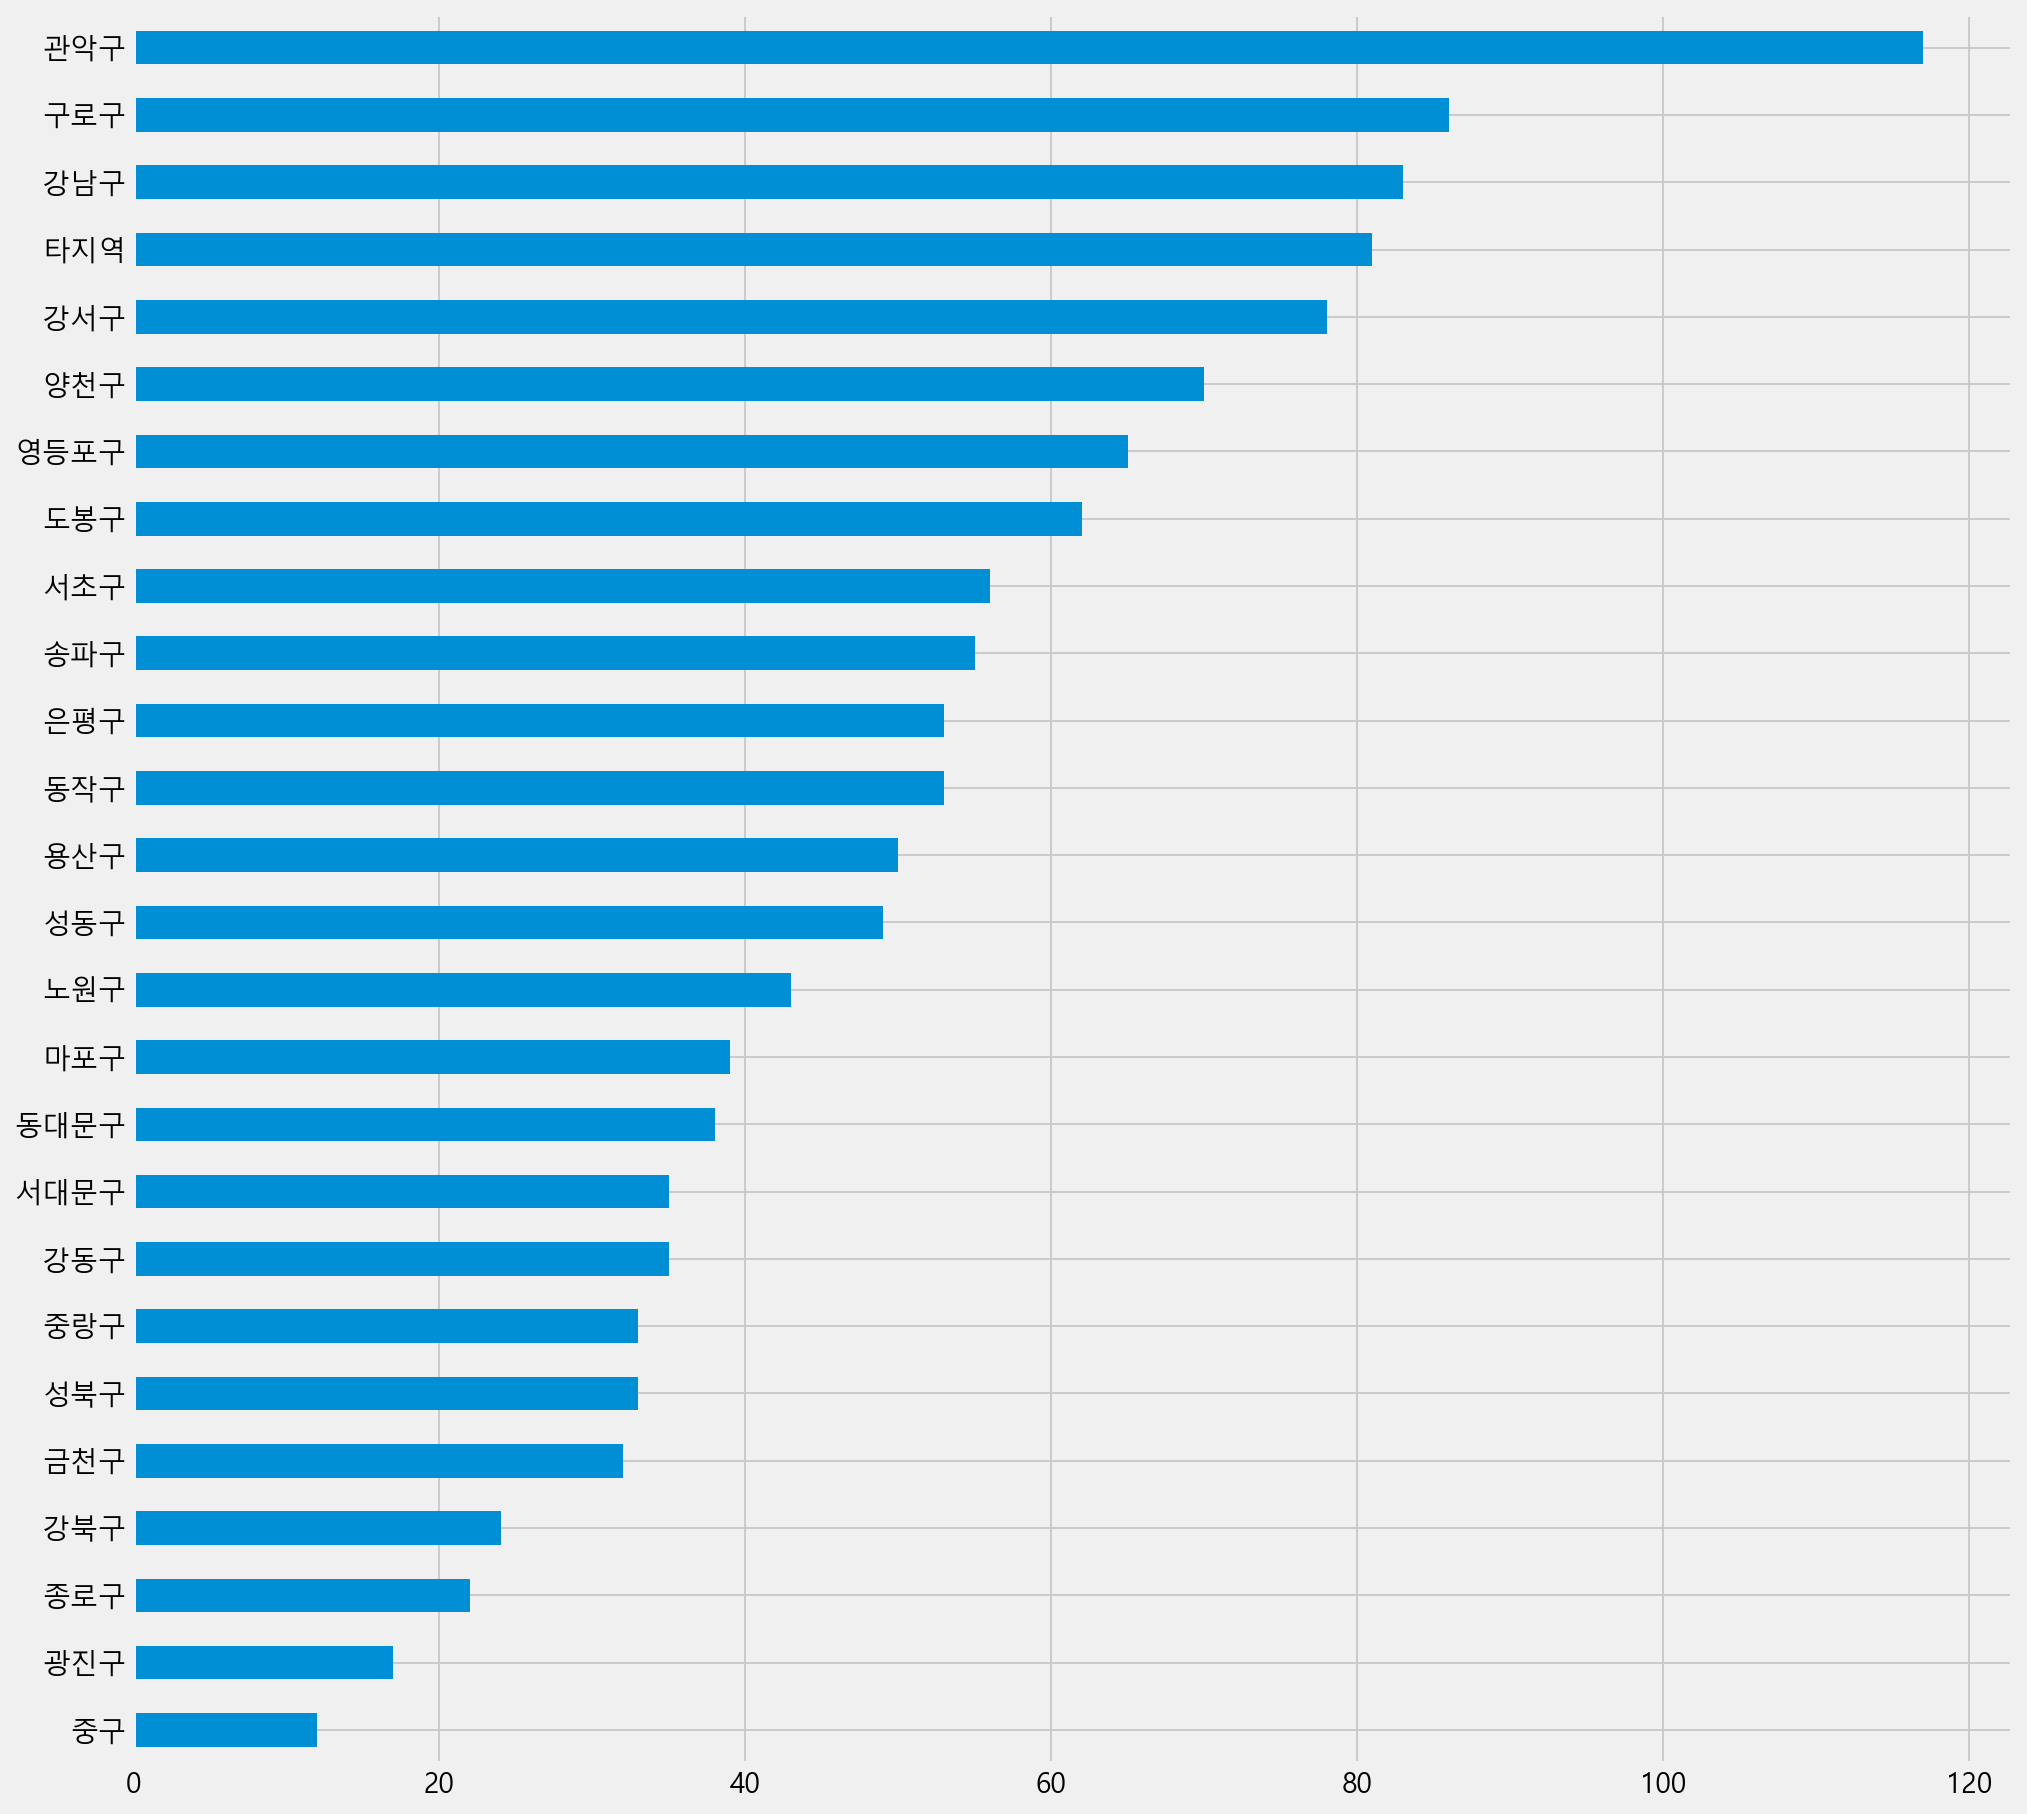

In [100]:
gu_etc_count.sort_values().plot.barh(figsize = (15,15))